# Imports

In [1]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

import constants as constants
import helpers.data_visualizer as datavisualizer
import algorithms.angle_analyzer as angleanalyzer

# Variables

In [2]:
# 200 expects linear (true), 270 expects curve (false), 400 expects overlap (false), 1400 expects straight line (true), 1320 expects end of curve (true), 1200 expects start of curve (false)
INDEX: int = 1400
CSV_FILE: str = "/Users/nicolas/Dropbox/3_Bildung/2 KZO/Stichwortverzeichnis/0 Maturarbeit/6 Wettbewerbe/1_SJf/3_Coaching/2_Projekt/software/flight-analyzer/docs/datasets/tracklogs/2_normalized/20211016_tracklog-normalized_nicolas-huber.csv"

# Initialisation

In [3]:
Analyzer: angleanalyzer.AngleAnalyzer = angleanalyzer.AngleAnalyzer(
    csv_file=CSV_FILE,
    latest_threshold=constants.ANGLE_PAST_THRESHOLD,
    future_threshold=constants.ANGLE_FUTURE_THRESHOLD,
    angle_threshold=constants.ANGLE_THRESHOLD,
    linear_regression_threshold=constants.LINEAR_REGRESSION_THRESHOLD
)
Visualizer: datavisualizer.DataVisualizer = datavisualizer.DataVisualizer()

# Data Import

In [4]:
data: pd.DataFrame = Analyzer.read_csv_file()

print("lenght: " + str(len(data)))
print()
print(data)

lenght: 8716

     timestamp [UTC]  relative altitude [m]  horizontal velocity [m/s]  \
0           12:25:30                    0.0                       1.39   
1           12:25:31                    1.0                       0.00   
2           12:25:32                    0.0                       0.00   
3           12:25:33                    1.0                       0.00   
4           12:25:34                    0.0                       1.39   
...              ...                    ...                        ...   
8711        13:01:44                -2061.0                       0.00   
8712        13:01:45                -2061.0                       0.00   
8713        13:01:46                -2061.0                       0.00   
8714        13:01:47                -2061.0                       1.94   
8715        13:01:48                -2061.0                       0.00   

      vertical velocity [m/s]  distance to takeoff [km]  longitude   latitude  
0                

# Analyze Coordintes

In [5]:
latest_coordinates: pd.DataFrame = Analyzer.extract_latest_coordinates(df=data, i=INDEX)
future_coordinates: pd.DataFrame = Analyzer.extract_future_coordinates(df=data, i=INDEX)

print("Past Coordinates")
print("--> lenght: " + str(len(latest_coordinates)))
print()
print(latest_coordinates)
print()

print("Future Coordinates")
print("--> lenght: " + str(len(future_coordinates)))
print()
print(future_coordinates)

Past Coordinates
--> lenght: 80

     timestamp [UTC]  relative altitude [m]  horizontal velocity [m/s]  \
1321        12:47:31                 -717.0                       7.50   
1322        12:47:32                 -717.0                       6.67   
1323        12:47:33                 -718.0                       8.61   
1324        12:47:34                 -718.0                       7.50   
1325        12:47:35                 -719.0                       7.78   
...              ...                    ...                        ...   
1396        12:48:46                 -823.0                      12.22   
1397        12:48:47                 -825.0                      12.22   
1398        12:48:48                 -826.0                      12.78   
1399        12:48:49                 -828.0                      13.33   
1400        12:48:50                 -829.0                      13.06   

      vertical velocity [m/s]  distance to takeoff [km]  longitude   latitude 

# Calculate Angles

In [6]:
angles_past: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(df=latest_coordinates)
)
angles_future: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(df=future_coordinates)
)

print("Past Angles")
print("--> lenght: " + str(len(angles_past)))
print()
print(angles_past)

print()

print("Future Angles")
print("--> lenght: " + str(len(angles_future)))
print()
print(angles_future)

Past Angles
--> lenght: 76

   timestamp  altitude  horizontal  vertical  distance  longitude   latitude  \
2   12:47:33    -718.0        8.61      -1.0      6.95   7.568100  46.270000   
3   12:47:34    -718.0        7.50       0.0      6.94   7.568000  46.269966   
4   12:47:35    -719.0        7.78      -1.0      6.93   7.567916  46.269933   
5   12:47:36    -720.0        8.61      -1.0      6.93   7.567816  46.269916   
6   12:47:37    -720.0        7.22       0.0      6.92   7.567716  46.269883   
..       ...       ...         ...       ...       ...        ...        ...   
73  12:48:44    -819.0       10.83      -2.0      6.48   7.559450  46.267933   
74  12:48:45    -821.0       12.22      -2.0      6.47   7.559316  46.267900   
75  12:48:46    -823.0       12.22      -2.0      6.47   7.559166  46.267866   
76  12:48:47    -825.0       12.22      -2.0      6.46   7.559016  46.267833   
77  12:48:48    -826.0       12.78      -1.0      6.45   7.558866  46.267800   

       angl

# Visualisation

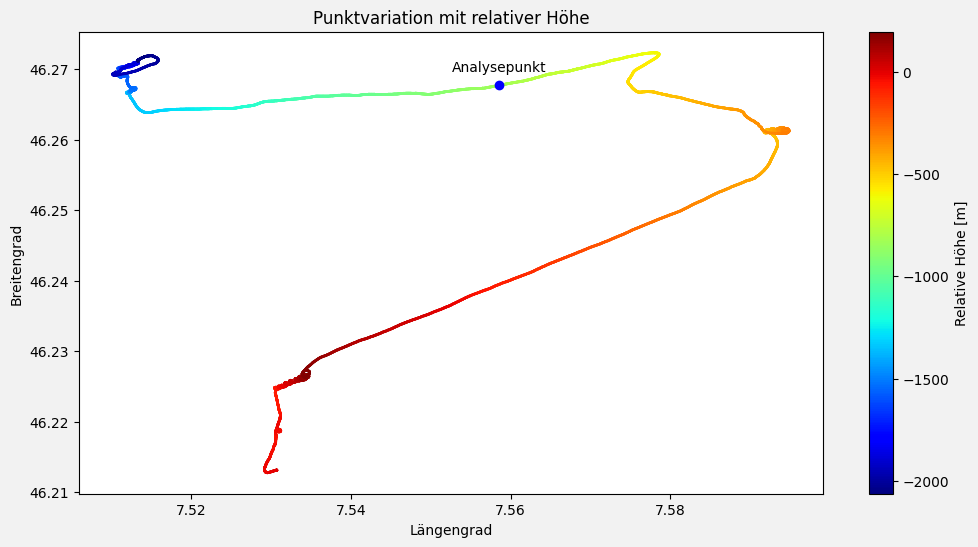

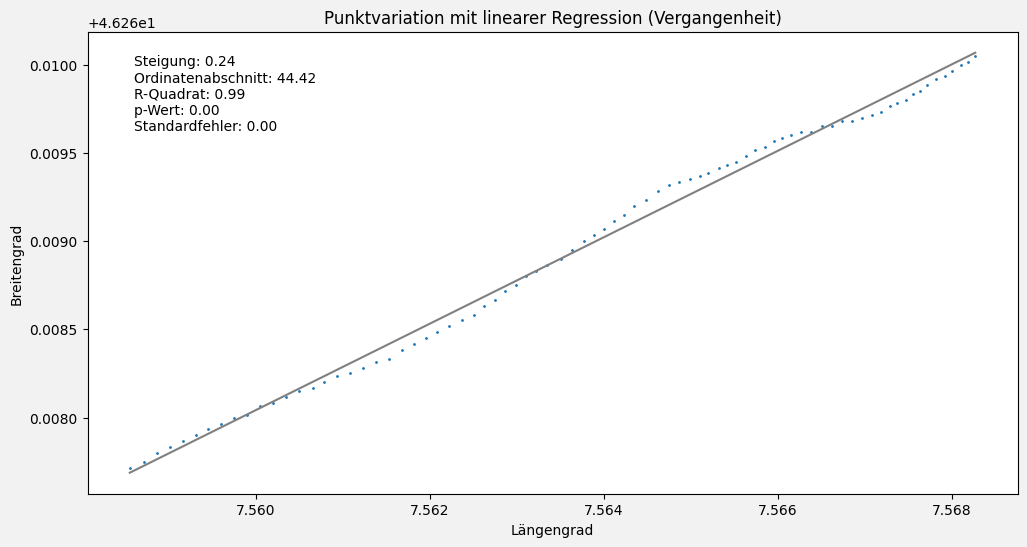

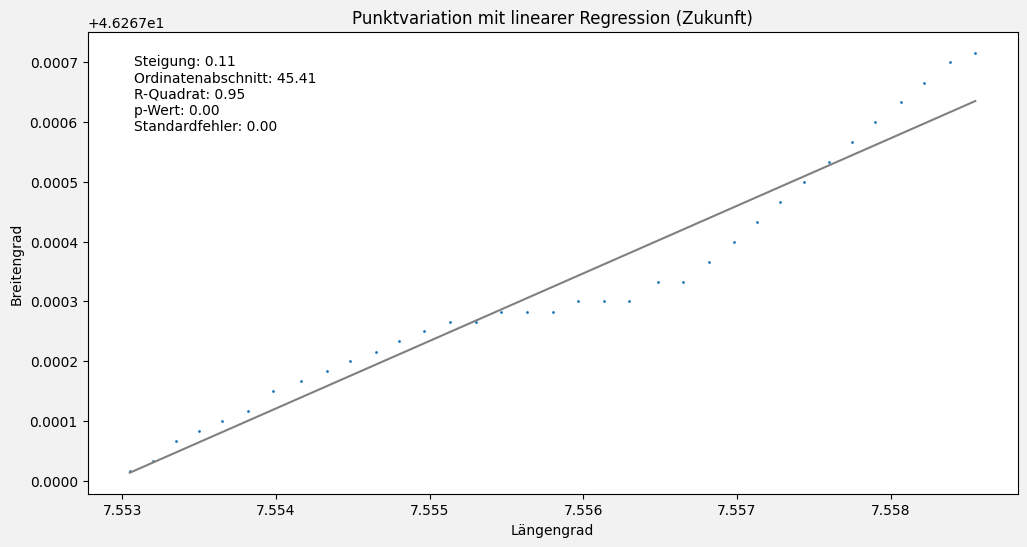

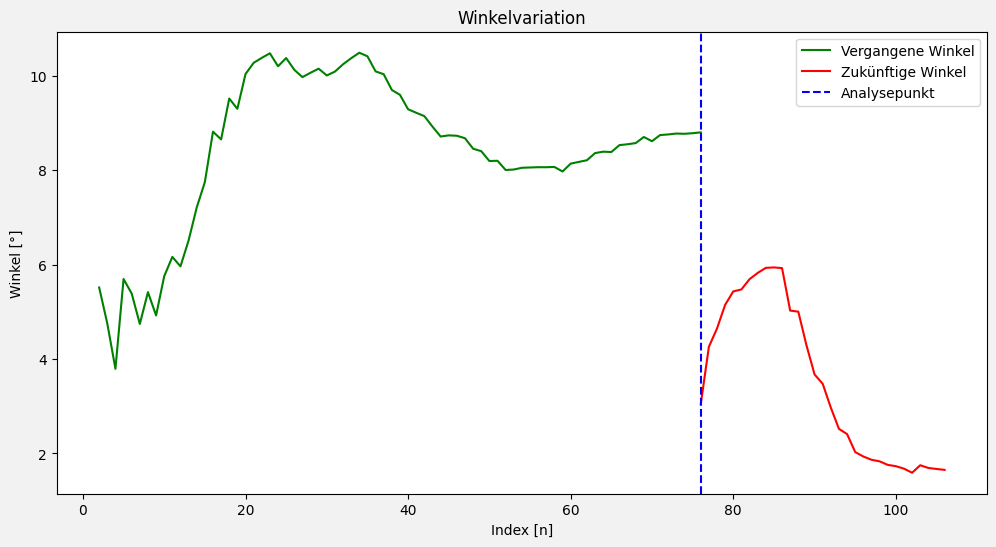

In [7]:
Visualizer.visualize_points_colored(df=data, relative=INDEX)
Visualizer.visualize_points_2d(df=latest_coordinates, relative=0, linear=True, title="Vergangenheit")
Visualizer.visualize_points_2d(df=future_coordinates, relative=0, linear=True, title="Zukunft")
Visualizer.visualize_angles(past_angles=angles_past, future_angles=angles_future)

# Analysis

In [8]:
status_angle_past: bool = Analyzer.analyze_angles(angles=angles_past)
status_angle_future: bool = Analyzer.analyze_angles(angles=angles_future)
(
    status_regression_past,
    slope_past,
    intercept_past,
    r_value_past,
    p_value_past,
    std_err_past,
) = Analyzer.analyze_linear_regression(df=latest_coordinates)
(
    status_regression_future,
    slope_future,
    intercept_future,
    r_value_future,
    p_value_future,
    std_err_future,
) = Analyzer.analyze_linear_regression(df=future_coordinates)

print("Angle Analysis")
print("--> Past: " + str(status_angle_past))
print("--> Future: " + str(status_angle_future))

print()

print("Past Linear Regression")
print("--> Status: " + str(status_regression_past))
print("--> Slope: " + str(slope_past))
print("--> Intercept: " + str(intercept_past))
print("--> R-Value: " + str(r_value_past))
print("--> P-Value: " + str(p_value_past))
print("--> Standard Error: " + str(std_err_past))

print()

print("Future Linear Regression")
print("--> Status: " + str(status_regression_future))
print("--> Slope: " + str(slope_future))
print("--> Intercept: " + str(intercept_future))
print("--> R-Value: " + str(r_value_future))
print("--> P-Value: " + str(p_value_future))
print("--> Standard Error: " + str(std_err_future))

print()

print("Data Analysis")
print(
    f"--> Status: {Analyzer.analyze_data(status_angle_past, status_regression_past, status_angle_future, status_regression_future)}"
)

Angle Analysis
--> Past: True
--> Future: True

Past Linear Regression
--> Status: True
--> Slope: 0.24496415928278734
--> Intercept: 44.41611343989336
--> R-Value: 0.9970350725539303
--> P-Value: 1.2004630598704919e-88
--> Standard Error: 0.0021406452009797685

Future Linear Regression
--> Status: True
--> Slope: 0.11306255384150318
--> Intercept: 45.41304614404877
--> R-Value: 0.9736381906284354
--> P-Value: 9.2965712930775e-23
--> Standard Error: 0.004610898882940768

Data Analysis
--> Status: (True, 'Straight Line', 0)


# System Info

In [9]:
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

@ Author Nicolas Huber
@ Author Email info@nicolas-huber.ch
@ Author URL https://nicolas-huber.ch
@ GitHub URL https://github.com/nicolashuberIT/flight-analyzer
